In [15]:
import os
from pathlib import Path
from typing import Literal
from matplotlib import pyplot as plt
import polars as pl

from pandera.polars import DataFrameSchema
from pandera.typing.polars import DataFrame
import seaborn as sns

# current directory をリポジトリルートに固定
os.chdir("/Users/masato.morita/src/recommender-experiments/")

# グラフに日本語を表示するために、日本語対応のフォントを設定 (例: IPAexゴシック)
plt.rcParams["font.family"] = "IPAexGothic"
print(plt.rcParams["font.family"])
import japanize_matplotlib

# 結果ファイルのパス
SIMURATION_RESULTS_OPE = Path("logs/logging_policy_experiment/ope_result.csv")
SIMURATION_RESULTS_OPL = Path("logs/logging_policy_experiment/opl_result.csv")


class OPEResult(DataFrameSchema):
    logging_policy_name: str
    n_rounds: int
    target_policy_true_value: float
    naive_estimate: float
    naive_error: float
    ips_estimate: float
    ips_error: float


class OPLResult(DataFrameSchema):
    logging_policy_name: str
    n_rounds: int
    trained_policy_true_value: float

['IPAexGothic']


In [16]:
ope_result_df = pl.read_csv(SIMURATION_RESULTS_OPE)
opl_result_df = pl.read_csv(SIMURATION_RESULTS_OPL)

print(ope_result_df)
print(opl_result_df)

shape: (495, 7)
┌───────────────┬──────────┬───────────────┬──────────────┬─────────────┬──────────────┬───────────┐
│ logging_polic ┆ n_rounds ┆ target_policy ┆ naive_estima ┆ naive_error ┆ ips_estimate ┆ ips_error │
│ y_name        ┆ ---      ┆ _true_value   ┆ te           ┆ ---         ┆ ---          ┆ ---       │
│ ---           ┆ i64      ┆ ---           ┆ ---          ┆ f64         ┆ f64          ┆ f64       │
│ str           ┆          ┆ f64           ┆ f64          ┆             ┆              ┆           │
╞═══════════════╪══════════╪═══════════════╪══════════════╪═════════════╪══════════════╪═══════════╡
│ pi_1          ┆ 50       ┆ 0.316         ┆ 0.0833       ┆ 0.2327      ┆ 0.02         ┆ 0.296     │
│ pi_1          ┆ 100      ┆ 0.308         ┆ 0.375        ┆ -0.067      ┆ 0.12         ┆ 0.188     │
│ pi_1          ┆ 150      ┆ 0.312667      ┆ 0.2075       ┆ 0.1051      ┆ 0.0733       ┆ 0.2393    │
│ pi_1          ┆ 200      ┆ 0.313         ┆ 0.3462       ┆ -0.0332     ┆ 0

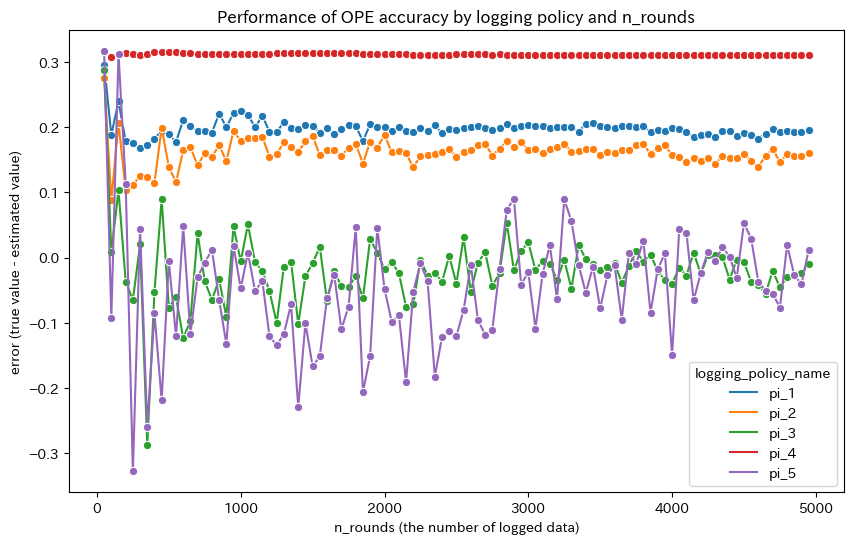

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=ope_result_df.to_pandas(),
    x="n_rounds",
    y="ips_error",
    hue="logging_policy_name",
    marker="o",
)
plt.xlabel("n_rounds (the number of logged data)")
plt.ylabel("error (true value - estimated value)")
plt.title("Performance of OPE accuracy by logging policy and n_rounds")
plt.legend(title="logging_policy_name")
plt.show()

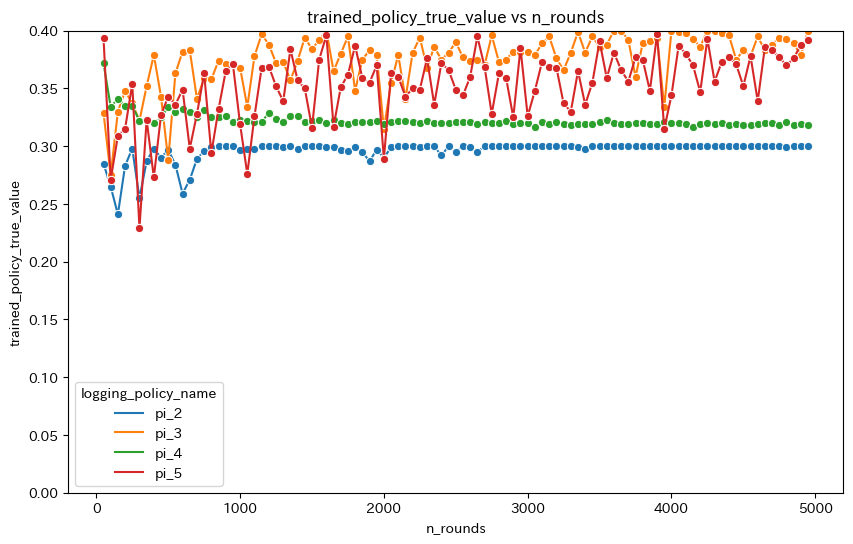

In [18]:
# グラフの描画
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=opl_result_df.to_pandas(),
    x="n_rounds",
    y="trained_policy_true_value",
    hue="logging_policy_name",
    marker="o",
)
# plt.xscale("log")
plt.xlabel("n_rounds")
plt.ylabel("trained_policy_true_value")
plt.ylim(0.0, 0.4)
plt.title("trained_policy_true_value vs n_rounds")
plt.legend(title="logging_policy_name")
plt.show()